In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')

In [3]:
from pandasjsm import pandasjsm

In [4]:
pj = pandasjsm("../database/")

In [5]:
df = pj.get_historical_prices('1301', all=True)

In [14]:
df

,open,high,low,close,adj_close,volume
date,,,,,,
2017-05-19,3080,3100,3060,3100,3100,40000
2017-05-22,3105,3145,3100,3145,3145,52200
2017-05-23,3145,3155,3135,3140,3140,44800
2017-05-24,3150,3175,3150,3175,3175,47500
2017-05-25,3175,3175,3115,3130,3130,23600
2017-05-26,3120,3120,3075,3080,3080,20700
2017-05-29,3075,3085,3060,3065,3065,15700
2017-05-30,3055,3065,3005,3025,3025,23100
2017-05-31,3010,3070,3010,3055,3055,28900


<IPython.core.display.Javascript object>


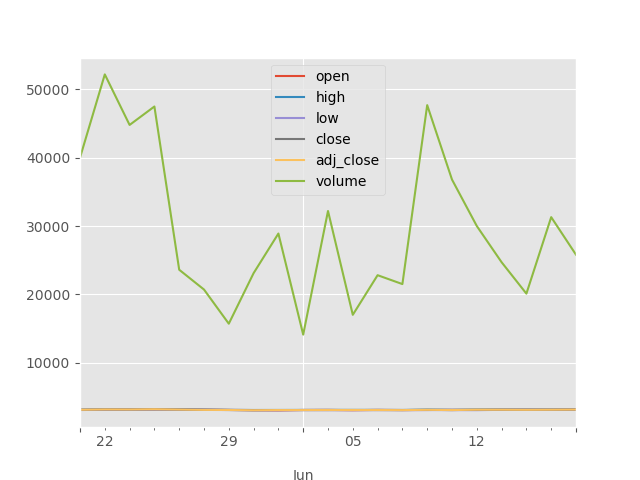

In [19]:
df.plot()